In [118]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as scipy
from scipy import stats

# Loading the dataset into a pandas dataframe 

In [119]:
df=pd.read_csv("StudentsPerformance.csv")

In [120]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


# To see the first ten Rows:

In [121]:
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


# To see the different types of data in our dataset:

In [122]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

# Statistical summaries:

In [123]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [124]:
df.describe(include='object')

,gender,race/ethnicity,parental level of education,lunch,test preparation course
count,1000,1000,1000,1000,1000
unique,2,5,6,2,2
top,female,group C,some college,standard,none
freq,518,319,226,645,642


# Checking for missing values:

In [125]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [126]:
# no missing values present in the dataframe


# Checking for outliers:

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='math score'>

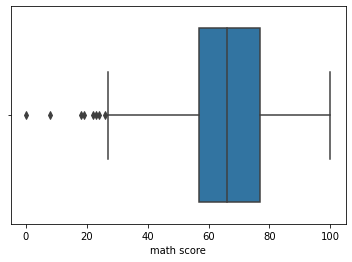

In [127]:
sns.boxplot(df['math score'])  # Here we can see there are 8 outliers in math score

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='reading score'>

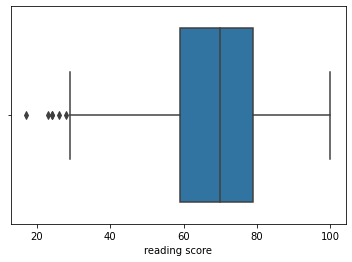

In [128]:
sns.boxplot(df['reading score']) # Here we can see there are 5 outliers in math score

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='writing score'>

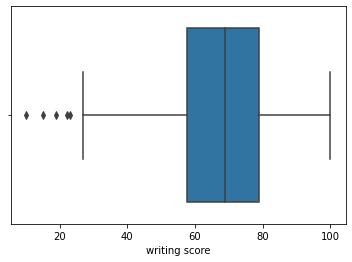

In [129]:
sns.boxplot(df['writing score']) # Here we can see there are 5 outliers in math score

In [130]:
Q1 = df['math score'].quantile(0.25)
Q3 = df['math score'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

20.0


In [131]:
df = df[~((df['math score']<(Q1-1.5*IQR))|(df['math score']>(Q3+1.5*IQR)))]

In [132]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [133]:
Q1 = df['reading score'].quantile(0.25)
Q3 = df['reading score'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

20.0


In [134]:
df = df[~((df['reading score']<(Q1-1.5*IQR))|(df['reading score']>(Q3+1.5*IQR)))]

In [90]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='writing score'>

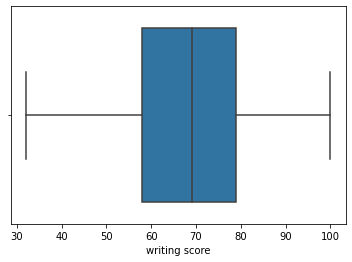

In [91]:
sns.boxplot(df['writing score'])

In [92]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [93]:
# After removing outliers from math score and reading score there are no outliers in writing score and the total number of rows came down from 1000 to 986.

In [117]:
df.to_csv("clean_data.csv",index=False)

In [94]:
df.describe()

,math score,reading score,writing score
count,986.000000,986.000000,986.000000
mean,66.694726,69.723124,68.648073
std,14.340780,13.910716,14.427092
min,27.000000,31.000000,32.000000
25%,57.000000,60.000000,58.000000
50%,66.500000,70.000000,69.000000
75%,77.000000,80.000000,79.000000
max,100.000000,100.000000,100.000000


# Performing data visualization:


#### 1) Bar plot to show the distribution of male and female students in the dataset. 

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='count'>

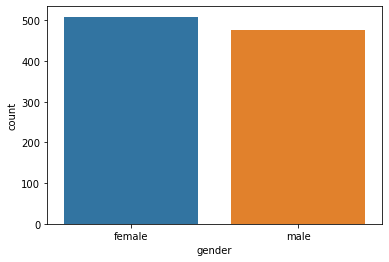

In [95]:
sns.countplot(df['gender']) # The diagram suggests there are more number of female than male in the entire dataset

#### 2) Histogram to show the distribution of the scores in math, reading, and writing. 

Text(0.5, 1.0, 'Math score of the population of the dataset')

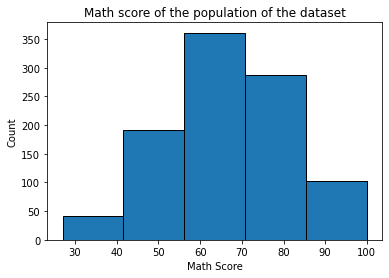

In [96]:
Math = df['math score']
plt.hist(Math,5,edgecolor='black')
plt.xlabel("Math Score")
plt.ylabel("Count")
plt.title("Math score of the population of the dataset")
# Most of the students scored about 60 to 70 marks in math

Text(0.5, 1.0, 'Reading score of the population of the dataset')

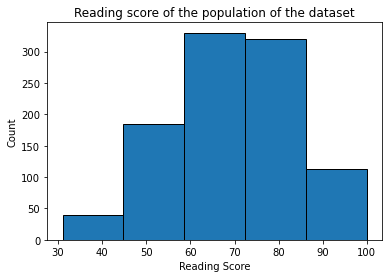

In [97]:
Reading = df['reading score']
plt.hist(Reading,5,edgecolor='black')
plt.xlabel("Reading Score")
plt.ylabel("Count")
plt.title("Reading score of the population of the dataset")
# Most of the students scored about 60 to 70 marks in reading

Text(0.5, 1.0, 'Writing score of the population of the dataset')

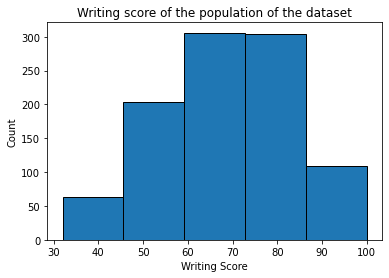

In [98]:
Writing = df['writing score']
plt.hist(Writing,5,edgecolor='black')
plt.xlabel("Writing Score")
plt.ylabel("Count")
plt.title("Writing score of the population of the dataset")
# Most of the students scored about 60 to 70 marks in writing

####  3) Bar plot to show the average scores in math, reading, and writing for each gender.

In [99]:
df['average score'] = (df['math score']+df['reading score']+df['writing score'])/3
df

<ipython-input-99-0a92ccad0a4e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['average score'] = (df['math score']+df['reading score']+df['writing score'])/3


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,65.000000
998,female,group D,some college,standard,completed,68,78,77,74.333333


<AxesSubplot:xlabel='gender', ylabel='average score'>

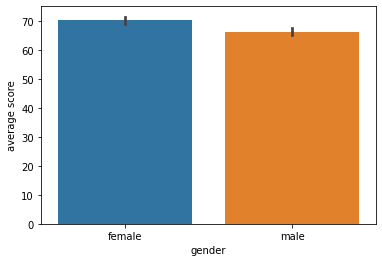

In [100]:
sns.barplot(x="gender",y="average score",data= df)
# Even the average score of female is higher than that of male

#### 4) Scatter plot to show the relationship between math, reading, and writing scores.

<AxesSubplot:xlabel='average score', ylabel='math score'>

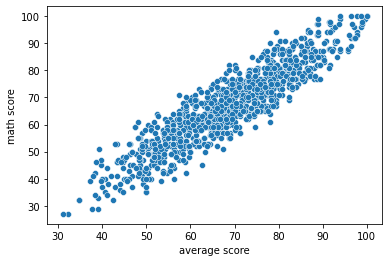

In [101]:
sns.scatterplot(x=df['average score'],y=df['math score'])

<AxesSubplot:xlabel='average score', ylabel='reading score'>

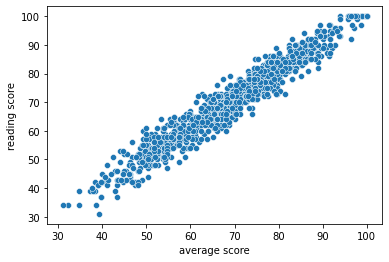

In [102]:
sns.scatterplot(x=df['average score'],y=df['reading score'])

<AxesSubplot:xlabel='average score', ylabel='writing score'>

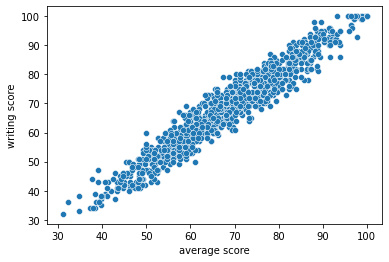

In [103]:
sns.scatterplot(x=df['average score'],y=df['writing score'])

# Statistical analysis:

In [104]:
df.mean()

math score       66.694726
reading score    69.723124
writing score    68.648073
average score    68.355308
dtype: float64

In [105]:
df.median()

math score       66.500000
reading score    70.000000
writing score    69.000000
average score    68.666667
dtype: float64

In [106]:
df.mode()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score
0,female,group C,some college,standard,none,65,72,74,68.0


In [107]:
df.std() # for finding out standard deviation 

math score       14.340780
reading score    13.910716
writing score    14.427092
average score    13.459114
dtype: float64

#### Performing t-test:

In [108]:
average_score_mean = np.mean(df['average score'])

In [109]:
average_score_mean

68.3553076402975

In [110]:
## Taking sample
sample_size = 30
score_sample = np.random.choice(df['average score'],sample_size)

In [111]:
score_sample

array([ 62.33333333,  81.66666667,  48.33333333,  58.66666667,
        45.33333333,  75.        ,  93.33333333,  74.33333333,
        78.        ,  70.        ,  52.33333333,  76.33333333,
        54.66666667,  68.66666667,  59.        ,  82.33333333,
        60.66666667,  76.33333333,  82.33333333,  89.        ,
        39.33333333,  60.66666667,  77.        , 100.        ,
        73.33333333,  55.66666667,  70.33333333,  60.33333333,
        78.        ,  82.33333333])

In [112]:
from scipy.stats import ttest_1samp

In [113]:
ttest,p_value = ttest_1samp(score_sample,average_score_mean)

In [114]:
print(p_value)

0.6614551585201058


In [115]:
if p_value <0.05: # Null hypothesis is the average score mean of the sample and population is same
    print("We are rejecting the null hypothesis")
else:  # Alternative hypothesis is the average score mean of the sample and population is different
    print("We are accepting the null hypothesis")

We are accepting the null hypothesis
